In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import MinMaxScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#importing data 

In [3]:
course_info=pd.read_csv('365_database/365_course_info.csv')
course_ratings=pd.read_csv('365_database/365_course_ratings.csv')
exam_info = pd.read_csv('365_database/365_exam_info.csv')
quiz_info = pd.read_csv('365_database/365_quiz_info.csv')
student_engagement = pd.read_csv('365_database/365_student_engagement.csv')
student_exams = pd.read_csv('365_database/365_student_exams.csv')
hub_questions = pd.read_csv('365_database/365_student_hub_questions.csv')
student_info = pd.read_csv('365_database/365_student_info.csv')
student_learning = pd.read_csv('365_database/365_student_learning.csv')
student_purchases = pd.read_csv('365_database/365_student_purchases.csv')
student_quizzes = pd.read_csv ('365_database/365_student_quizzes.csv')

In [4]:
#preprocessing and preperation

In [5]:
course_info.head()

,course_id,course_title
0,2,Introduction to Tableau
1,3,The Complete Data Visualization Course with Py...
2,4,Introduction to R Programming
3,5,Data Preprocessing with NumPy
4,7,Introduction to Data and Data Science


In [6]:
course_ratings.head()

,course_id,student_id,course_rating,date_rated
0,14,258956,5,2022-07-06
1,7,259019,5,2022-08-30
2,23,259019,4,2022-08-30
3,14,259283,5,2022-07-08
4,30,259283,5,2022-07-02


In [7]:
exam_info.head()

,exam_id,exam_category,exam_duration
0,118,2,14
1,119,2,14
2,120,1,26
3,276,2,15
4,277,2,15


In [8]:
quiz_info.head()

,quiz_id,question_id,answer_id,answer_correct
0,1,1,1,n
1,1,1,2,y
2,1,1,3,n
3,1,1,4,n
4,2,2,5,n


In [9]:
student_engagement.head()

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
0,1,274999,1,1,1,2022-05-27
1,3,274501,0,0,1,2022-05-27
2,4,272842,1,1,1,2022-05-27
3,8,275173,0,0,1,2022-05-27
4,11,274876,0,1,0,2022-05-27


In [10]:
student_exams.head()

,exam_attempt_id,student_id,exam_id,exam_result,exam_completion_time,date_exam_completed
0,173311,258803,475,83,5.17,2022-01-01
1,173332,258815,380,0,10.02,2022-01-01
2,173333,258815,380,67,7.93,2022-01-01
3,173335,258815,380,100,0.60,2022-01-01
4,173336,258815,380,0,10.02,2022-01-01


In [11]:
hub_questions.head()

,hub_question_id,student_id,date_question_asked
0,7619,258803,2022-01-03
1,7630,258803,2022-01-04
2,7662,259342,2022-01-05
3,7667,259391,2022-01-05
4,7668,259174,2022-01-05


In [12]:
student_info.head()

,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01


In [13]:
student_learning.head()

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07


In [14]:
student_purchases.head()

,purchase_id,student_id,purchase_type,date_purchased
0,15781,258800,Annual,2022-01-01
1,15786,258803,Annual,2022-01-01
2,15808,258862,Annual,2022-01-01
3,15809,258865,Annual,2022-01-01
4,15811,258878,Annual,2022-01-01


In [15]:
student_quizzes.head()

,student_id,quiz_id,question_id,answer_id
0,258803,537,796,3139.0
1,258803,159,793,3127.0
2,258803,159,794,3132.0
3,258803,160,181,710.0
4,258803,161,184,723.0


In [16]:
#merging data

In [17]:
df = pd.merge(student_learning, student_purchases, how='left', on='student_id')\
     .merge(student_info, how='left', on='student_id')\
     .merge(course_ratings, how='left', on=['student_id', 'course_id'])

In [18]:
df.head()

,student_id,course_id,minutes_watched,date_watched,purchase_id,purchase_type,date_purchased,student_country,date_registered,course_rating,date_rated
0,258798,23,0.3,2022-01-01,NaN,NaN,NaN,IN,2022-01-01,NaN,NaN
1,258800,2,12.9,2022-04-01,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
2,258800,7,46.8,2022-01-03,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
3,258800,7,4.3,2022-01-04,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
4,258800,7,31.7,2022-01-07,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN


In [19]:
df.shape

(87633, 11)

In [20]:
df['purchase_type']

0           NaN
1        Annual
2        Annual
3        Annual
4        Annual
          ...  
87628       NaN
87629       NaN
87630       NaN
87631       NaN
87632       NaN
Name: purchase_type, Length: 87633, dtype: object

In [21]:
df['purchase_type'].unique()

array([nan, 'Annual', 'Monthly', 'Quarterly'], dtype=object)

In [22]:
df['purchase'] = df['purchase_type']

dic = {'Annual':1, 'Monthly':1, 'Quarterly': 1, np.nan: 0}

df['purchase'] = df['purchase'].map(dic)

df['purchase'] = df['purchase'].astype('int')


In [23]:
df.drop('purchase_type', axis=1, inplace=True)

In [24]:
df.head()

,student_id,course_id,minutes_watched,date_watched,purchase_id,date_purchased,student_country,date_registered,course_rating,date_rated,purchase
0,258798,23,0.3,2022-01-01,NaN,NaN,IN,2022-01-01,NaN,NaN,0
1,258800,2,12.9,2022-04-01,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
2,258800,7,46.8,2022-01-03,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
3,258800,7,4.3,2022-01-04,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
4,258800,7,31.7,2022-01-07,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1


In [25]:
df.shape

(87633, 11)

In [26]:
df=df.drop(['student_id','purchase_id'],axis=1)
df.head()

,course_id,minutes_watched,date_watched,date_purchased,student_country,date_registered,course_rating,date_rated,purchase
0,23,0.3,2022-01-01,NaN,IN,2022-01-01,NaN,NaN,0
1,2,12.9,2022-04-01,2022-01-01,CA,2022-01-01,NaN,NaN,1
2,7,46.8,2022-01-03,2022-01-01,CA,2022-01-01,NaN,NaN,1
3,7,4.3,2022-01-04,2022-01-01,CA,2022-01-01,NaN,NaN,1
4,7,31.7,2022-01-07,2022-01-01,CA,2022-01-01,NaN,NaN,1


In [27]:
df.isna().sum() #to find total missing values column wise

course_id              0
minutes_watched        0
date_watched           0
date_purchased     27204
student_country       44
date_registered        0
course_rating      71054
date_rated         71054
purchase               0
dtype: int64

In [28]:
df.dtypes

course_id            int64
minutes_watched    float64
date_watched        object
date_purchased      object
student_country     object
date_registered     object
course_rating      float64
date_rated          object
purchase             int64
dtype: object

In [29]:
df['date_purchased'].fillna(df['date_registered'], inplace=True)
df['date_rated'].fillna(df['date_registered'], inplace=True)
df.head()

,course_id,minutes_watched,date_watched,date_purchased,student_country,date_registered,course_rating,date_rated,purchase
0,23,0.3,2022-01-01,2022-01-01,IN,2022-01-01,NaN,2022-01-01,0
1,2,12.9,2022-04-01,2022-01-01,CA,2022-01-01,NaN,2022-01-01,1
2,7,46.8,2022-01-03,2022-01-01,CA,2022-01-01,NaN,2022-01-01,1
3,7,4.3,2022-01-04,2022-01-01,CA,2022-01-01,NaN,2022-01-01,1
4,7,31.7,2022-01-07,2022-01-01,CA,2022-01-01,NaN,2022-01-01,1


In [30]:
X = df.drop(['purchase'], axis=1)
y = df['purchase']
y=y.astype('int')



<AxesSubplot:>

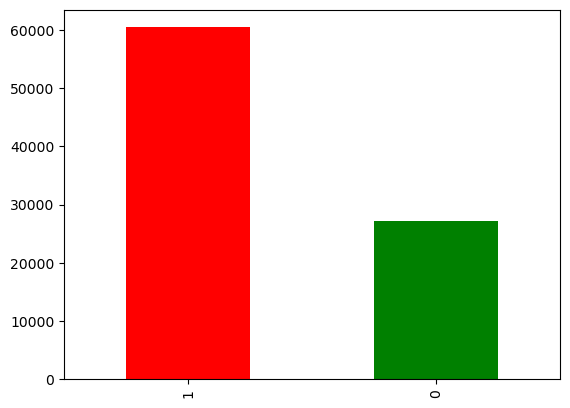

In [31]:
y.value_counts().plot(kind='bar', color=['red', 'green'])

In [32]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (87633, 8)
y shape:  (87633,)


<AxesSubplot:>

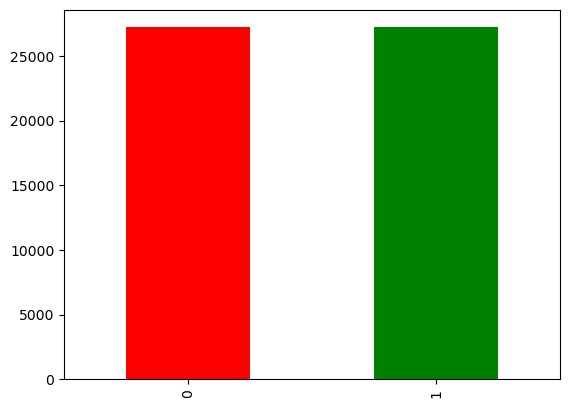

In [33]:
rsu = RandomUnderSampler()

X_res, y_res = rsu.fit_resample(X, y)
y_res.value_counts().plot(kind='bar', color=['red', 'green'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365, stratify=y)

In [35]:
print(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.68957
0    0.31043
Name: purchase, dtype: float64 1    0.689565
0    0.310435
Name: purchase, dtype: float64
1    0.689565
0    0.310435
Name: purchase, dtype: float64


In [36]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (70106, 8)
X_test shape:  (17527, 8)
y_train shape:  (70106,)
y_test shape:  (17527,)


In [37]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
fit = imputer.fit_transform(X_train)
X_train = pd.DataFrame(data = fit, columns=imputer.feature_names_in_)
X_test  = pd.DataFrame(data = imputer.transform(X_test), columns=imputer.feature_names_in_)

X_train.head()

,course_id,minutes_watched,date_watched,date_purchased,student_country,date_registered,course_rating,date_rated
0,7,54.6,2022-01-14,2022-01-13,US,2022-01-13,5.0,2022-01-13
1,37,0.2,2022-04-15,2022-04-12,TN,2022-04-12,5.0,2022-04-12
2,53,35.5,2022-06-20,2022-06-08,AE,2022-06-08,5.0,2022-06-21
3,7,6.9,2022-02-08,2022-01-19,US,2022-01-19,5.0,2022-01-19
4,30,0.3,2022-04-19,2022-04-19,MA,2022-04-19,5.0,2022-04-19


In [38]:
X_train.isna().sum()

course_id          0
minutes_watched    0
date_watched       0
date_purchased     0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64

In [39]:
#converting some columns to date-time

In [40]:
columns= ['date_registered','date_watched','date_rated']
for i in columns:
    X_train[i]=pd.to_datetime(X_train[i])
    X_test[i] = pd.to_datetime(X_test[i])

In [41]:
X_train.isna().sum()

course_id          0
minutes_watched    0
date_watched       0
date_purchased     0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64

In [42]:
#finding differences between the dates

In [44]:
#registered vs watched
X_train['regVsWatch'] = X_train['date_watched']-X_train['date_registered']
X_test['regVsWatch'] = X_test['date_watched']-X_train['date_registered']

#watched vs rated
X_train['watchVsRate'] = X_train['date_rated']-X_train['date_watched']
X_test['watchVsRate'] = X_train['date_rated'] - X_train['date_watched']


In [45]:
X_train.head()

,course_id,minutes_watched,date_watched,date_purchased,student_country,date_registered,course_rating,date_rated,regVsWatch,watchVsRate
0,7,54.6,2022-01-14,2022-01-13,US,2022-01-13,5.0,2022-01-13,1 days,-1 days
1,37,0.2,2022-04-15,2022-04-12,TN,2022-04-12,5.0,2022-04-12,3 days,-3 days
2,53,35.5,2022-06-20,2022-06-08,AE,2022-06-08,5.0,2022-06-21,12 days,1 days
3,7,6.9,2022-02-08,2022-01-19,US,2022-01-19,5.0,2022-01-19,20 days,-20 days
4,30,0.3,2022-04-19,2022-04-19,MA,2022-04-19,5.0,2022-04-19,0 days,0 days


In [46]:
X_train.isnull().sum()

course_id          0
minutes_watched    0
date_watched       0
date_purchased     0
student_country    0
date_registered    0
course_rating      0
date_rated         0
regVsWatch         0
watchVsRate        0
dtype: int64

In [47]:
X_train=X_train.drop(['date_watched','date_purchased','date_rated','date_registered'],axis=1)
X_test=X_test.drop(['date_watched','date_purchased','date_rated','date_registered'],axis=1)

X_train.head()



,course_id,minutes_watched,student_country,course_rating,regVsWatch,watchVsRate
0,7,54.6,US,5.0,1 days,-1 days
1,37,0.2,TN,5.0,3 days,-3 days
2,53,35.5,AE,5.0,12 days,1 days
3,7,6.9,US,5.0,20 days,-20 days
4,30,0.3,MA,5.0,0 days,0 days


In [54]:
encoder  = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

label = ['student_country']

X_train[label] = encoder.fit_transform(X_train[label])

X_test[label] = encoder.transform(X_test[label])

In [55]:
X_train.head()

,course_id,minutes_watched,student_country,course_rating,regVsWatch,watchVsRate
0,7,54.6,157.0,5.0,1 days,-1 days
1,37,0.2,150.0,5.0,3 days,-3 days
2,53,35.5,1.0,5.0,12 days,1 days
3,7,6.9,157.0,5.0,20 days,-20 days
4,30,0.3,94.0,5.0,0 days,0 days


In [57]:
X_train = X_train.astype({'course_id': 'int64','minutes_watched': 'int64', 'course_rating': 'int64', 'regVsWatch': 'str', 'watchVsRate':'str', 'student_country': 'int64'})
X_test  = X_test.astype({'course_id': 'int64','minutes_watched': 'int64', 'course_rating': 'int64', 'regVsWatch': 'str', 'watchVsRate':'str', 'student_country': 'int64'}) 


X_train['regVsWatch'] = np.abs((X_train['regVsWatch'].apply(lambda x : x.split(' ')[0])).astype('int64'))
X_test['regVsWatch'] = np.abs((X_test['regVsWatch'].apply(lambda x : x.split(' ')[0])).astype('int64'))

X_train['watchVsRate'] = np.abs((X_train['watchVsRate'].apply(lambda x : x.split(' ')[0])).astype('int64'))
X_test['watchVsRate'] = np.abs((X_test['watchVsRate'].apply(lambda x : x.split(' ')[0])).astype('int64'))

In [58]:
X_train.head()

,course_id,minutes_watched,student_country,course_rating,regVsWatch,watchVsRate
0,7,54,157,5,1,1
1,37,0,150,5,3,3
2,53,35,1,5,12,1
3,7,6,157,5,20,20
4,30,0,94,5,0,0


In [ ]:
#one hot encoding


In [ ]:
#course_id_onehot=pd.get_dummies(X_train['course_id'],prefix='course_id')

In [ ]:
#X_train_len=X_train.shape[0]
#X_concat=pd.concat([X_train,X_test],ignore_index = True, sort = False)

#course_id_onehot=pd.get_dummies(X_concat['course_id'],prefix='course_id')
#X_concat = X_concat.join(course_id_onehot)
#student_country_onehot=pd.get_dummies(X_concat['student_country'],prefix='student_country')
#X_concat = X_concat.join(student_country_onehot)

#X_concat = X_concat.drop(['course_id','student_country'],axis=1)

#X_concat.head()

In [ ]:
#X_train = X_concat[:X_train_len]
#X_test = X_concat[X_train_len:]

In [ ]:
#X_train.columns


In [ ]:
#drop columns not required

In [ ]:
#X_train.drop(columns=['date_registered', 'date_rated', 'date_watched'], inplace=True)
#X_test.drop(columns=['date_registered', 'date_rated', 'date_watched'], inplace=True)

In [59]:
X_train.dtypes

course_id          int64
minutes_watched    int64
student_country    int64
course_rating      int64
regVsWatch         int64
watchVsRate        int64
dtype: object

In [60]:
#feature scaling

In [62]:
scaler = MinMaxScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
X_train_scale = pd.DataFrame(X_train_scale, columns=scaler.feature_names_in_)
X_test_scale = pd.DataFrame(X_test_scale, columns=scaler.feature_names_in_)

In [63]:
X_train_scale.head()

,course_id,minutes_watched,student_country,course_rating,regVsWatch,watchVsRate
0,0.076923,0.034951,0.940120,1.0,0.003436,0.003436
1,0.538462,0.000000,0.898204,1.0,0.010309,0.010309
2,0.784615,0.022654,0.005988,1.0,0.041237,0.003436
3,0.076923,0.003883,0.940120,1.0,0.068729,0.068729
4,0.430769,0.000000,0.562874,1.0,0.000000,0.000000


In [65]:
X_test_scale.head()

,course_id,minutes_watched,student_country,course_rating,regVsWatch,watchVsRate
0,0.076923,0.010356,-0.005988,1.0,0.924399,0.003436
1,0.076923,0.002589,-0.005988,1.0,0.302405,0.010309
2,0.292308,0.010356,-0.005988,1.0,0.030928,0.003436
3,0.184615,0.005825,-0.005988,1.0,0.024055,0.068729
4,0.184615,0.037540,-0.005988,1.0,0.068729,0.000000


In [66]:
#building a model

In [68]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scale, y_train)

KNeighborsClassifier(n_neighbors=4)

In [69]:
y_predict = knn.predict(X_test_scale)

In [72]:
accuracy_score(y_test,y_predict)

0.6382153249272551

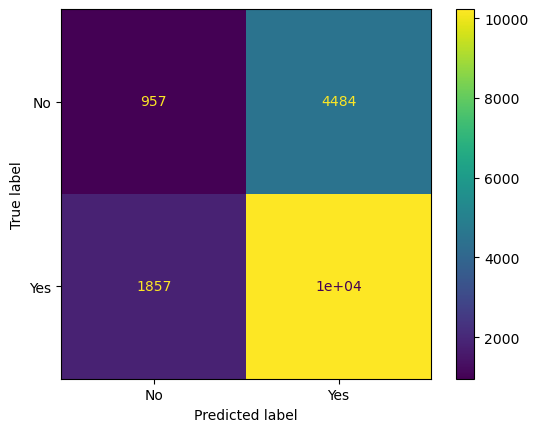

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, display_labels=['No', 'Yes'])


In [76]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.34      0.18      0.23      5441
           1       0.70      0.85      0.76     12086

    accuracy                           0.64     17527
   macro avg       0.52      0.51      0.50     17527
weighted avg       0.58      0.64      0.60     17527



In [ ]:
grid_params = { 'n_neighbors': np.arange(1, 10), 
                'weights': ['uniform', 'distance'],
                'p': np.arange(1, 3) }

grid = GridSearchCV(knn, grid_params,scoring='accuracy')

In [ ]:
grid.fit(X_train_scale, y_train)

In [83]:
print("The best parameters are ", grid.best_params_)
print("The best score is ", grid.best_score_)
best_est = grid.best_estimator_

The best parameters are  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
The best score is  0.8860725101194307


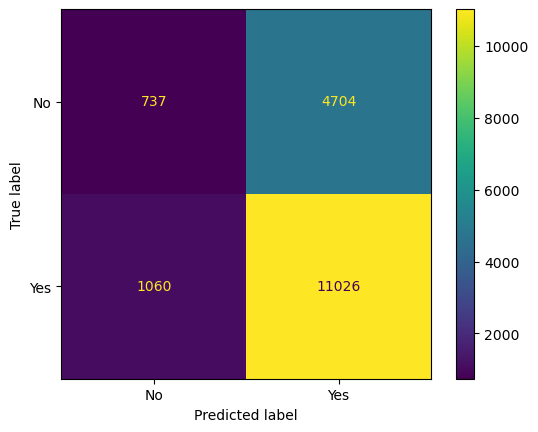

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test, best_est.predict(X_test_scale), display_labels=['No', 'Yes'])

In [87]:
print(classification_report(y_test, best_est.predict(X_test_scale)))

              precision    recall  f1-score   support

           0       0.41      0.14      0.20      5441
           1       0.70      0.91      0.79     12086

    accuracy                           0.67     17527
   macro avg       0.56      0.52      0.50     17527
weighted avg       0.61      0.67      0.61     17527



In [88]:
#multiple models

In [90]:
MultipleModels = {'LogisticRegression':LogisticRegression(),
                 'DecisionTreeClassifier': DecisionTreeClassifier(),
                 'RandomForestClassifier': RandomForestClassifier()}

In [91]:
scores=[]
for name, model in MultipleModels.items():
    model.fit(X_train_scale, y_train)
    y_pred=model.predict(X_test_scale)
    scores.append({
        'name':name,
        'accuracy':accuracy_score(y_test,y_pred),
        'recall':recall_score(y_test,y_pred),
        'precision':precision_score(y_test,y_pred),
        'f1': f1_score(y_test,y_pred)
    })

In [92]:
df_scores = print(pd.DataFrame(scores))

                     name  accuracy    recall  precision        f1
0      LogisticRegression  0.667370  0.885570   0.706469  0.785945
1  DecisionTreeClassifier  0.674559  0.822522   0.736370  0.777066
2  RandomForestClassifier  0.691048  0.962353   0.701043  0.811173


In [96]:
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [105]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6875677526102585


In [102]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_log_pred = logr.predict(X_test)

In [103]:
print(classification_report(y_test, y_log_pred))

              precision    recall  f1-score   support

           0       0.43      0.20      0.27      5441
           1       0.71      0.88      0.79     12086

    accuracy                           0.67     17527
   macro avg       0.57      0.54      0.53     17527
weighted avg       0.62      0.67      0.63     17527



In [110]:
score = logr.score(X_test, y_test)
print(score)

0.6706795230216238


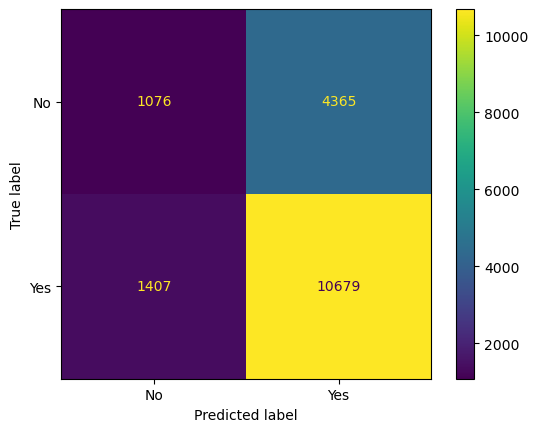

In [104]:
ConfusionMatrixDisplay.from_predictions(y_test, y_log_pred, display_labels=['No', 'Yes'])